In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Creation
ticker_symbol = "GOOGL" # just replace it with any other ticker symbol listed in NYSE/NASDAQ
path = "../input/price-volume-data-for-all-us-stocks-etfs/Stocks/" + ticker_symbol.lower() + ".us.txt"
file = open(path)
columns = list(file.readline().strip().split(","))

data = []
for line in file.readlines():
    data.append(line.strip().split(","))

df = pd.DataFrame(data=data, columns=columns)
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50,52.03,47.98,50.17,44703800,0
1,2004-08-20,50.505,54.54,50.25,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.7,18274400,0
3,2004-08-24,55.62,55.8,51.785,52.435,15262600,0
4,2004-08-25,52.48,54,51.94,53,9197800,0


In [3]:
# Dropping unnecessary columns
data = df.reset_index()["Close"].astype("float32")
data.head()

0    50.169998
1    54.154999
2    54.700001
3    52.435001
4    53.000000
Name: Close, dtype: float32

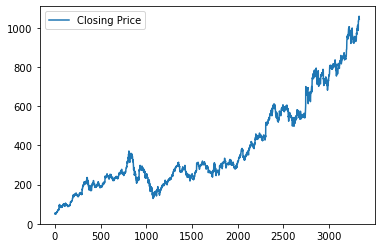

In [4]:
# Visualizing the closing price
try:
    sns.lineplot(data=data[:, 0], label="Closing Price")
except:
    sns.lineplot(data=data, label="Closing Price")

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))
print(data.shape)

(3333, 1)


In [6]:
# Splitting dataset into train and test split
train_size = int(len(data) * 0.65)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data), :1]
print(train_size, test_size)

2166 1167


In [7]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# Preparing the dataset
time_step = 90
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [9]:
# X and y shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2075, 90) (2075,)
(1076, 90) (1076,)


In [10]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)
print(X_train.shape, X_test.shape)

(2075, 90, 1) (1076, 90, 1)


In [11]:
# Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [12]:
# Model
model=Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Run the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
65/65 [==============================] - 6s 95ms/step - loss: 0.0045 - val_loss: 0.0094
Epoch 2/10
65/65 [==============================] - 5s 80ms/step - loss: 1.9430e-04 - val_loss: 9.4425e-04
Epoch 3/10
65/65 [==============================] - 5s 80ms/step - loss: 1.4273e-04 - val_loss: 9.0557e-04
Epoch 4/10
65/65 [==============================] - 5s 83ms/step - loss: 1.3392e-04 - val_loss: 4.9912e-04
Epoch 5/10
65/65 [==============================] - 5s 81ms/step - loss: 1.3454e-04 - val_loss: 4.8259e-04
Epoch 6/10
65/65 [==============================] - 5s 82ms/step - loss: 1.2986e-04 - val_loss: 4.7140e-04
Epoch 7/10
65/65 [==============================] - 5s 79ms/step - loss: 1.2541e-04 - val_loss: 4.2209e-04
Epoch 8/10
65/65 [==============================] - 5s 81ms/step - loss: 1.2104e-04 - val_loss: 4.0544e-04
Epoch 9/10
65/65 [==============================] - 5s 80ms/step - loss: 1.1267e-04 - val_loss: 4.0374e-04
Epoch 10/10
65/65 [==========================

In [14]:
# Predicting the results
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
results = np.concatenate((train_predict, test_predict), axis=0)

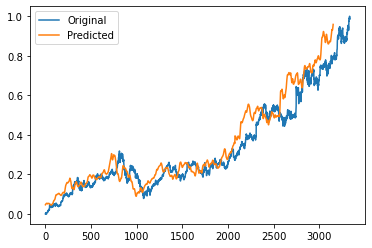

In [15]:
# Original vs Predicted
try:
    sns.lineplot(data=data[:, 0], label="Original")
    sns.lineplot(data=results[:, 0], label="Predicted")
except:
    sns.lineplot(data=data, label="Original")
    sns.lineplot(data=results, label="Predicted")

Please give an upvote if you found this notebook helpful and feel free to give any suggestions. Thanks & stay safe!!!